<a href="https://colab.research.google.com/github/Mezo-555/AI_Platforms_Assignments/blob/main/Ai_Platforms_Ass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

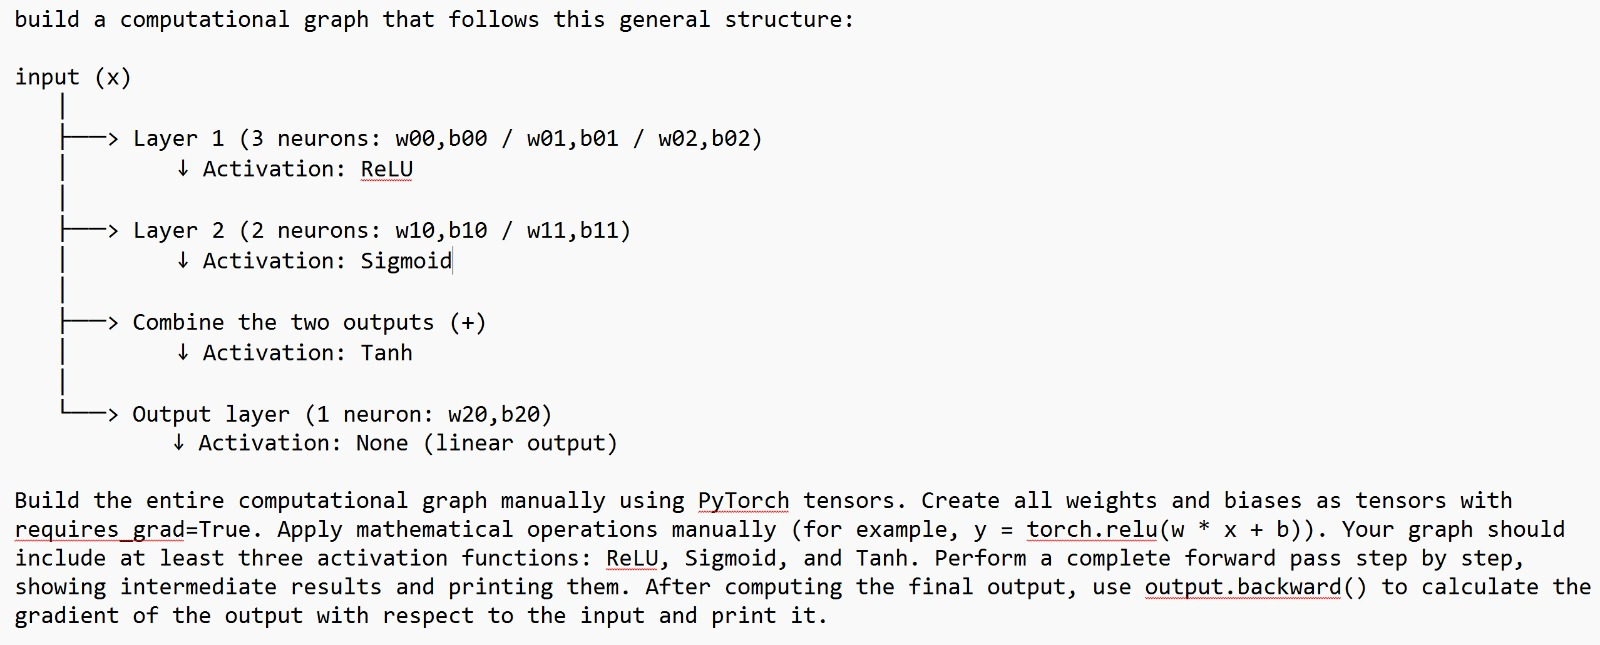

In [1]:
# Import modules
import torch
import torch.nn as nn

In [2]:
class ManualNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Layer 1 (3 neurons)
        self.w00 = nn.Parameter(torch.tensor(0.8))
        self.b00 = nn.Parameter(torch.tensor(-0.1))
        self.w01 = nn.Parameter(torch.tensor(-0.3))
        self.b01 = nn.Parameter(torch.tensor(0.5))
        self.w02 = nn.Parameter(torch.tensor(0.2))
        self.b02 = nn.Parameter(torch.tensor(0.0))

        # Layer 2 (2 neurons, each takes 3 inputs)
        self.W1_0 = nn.Parameter(torch.tensor([0.5, -1.0, 0.25]))
        self.b1_0 = nn.Parameter(torch.tensor(0.1))
        self.W1_1 = nn.Parameter(torch.tensor([-0.4, 0.9, 0.1]))
        self.b1_1 = nn.Parameter(torch.tensor(-0.2))

        # Combine stage (Tanh)
        self.wc0 = nn.Parameter(torch.tensor(1.2))
        self.wc1 = nn.Parameter(torch.tensor(-0.7))
        self.bc = nn.Parameter(torch.tensor(0.05))

        # Output layer (linear)
        self.w20 = nn.Parameter(torch.tensor(0.9))
        self.b20 = nn.Parameter(torch.tensor(-0.05))

    def forward(self, x):
        # --- Layer 1 ---
        z0 = self.w00 * x + self.b00
        a0 = torch.relu(z0)
        z1 = self.w01 * x + self.b01
        a1 = torch.relu(z1)
        z2 = self.w02 * x + self.b02
        a2 = torch.relu(z2)
        a_vec = torch.stack([a0, a1, a2])

        print("\nLayer 1:")
        print(f"  a_vec = {a_vec.detach().numpy()}")

        # --- Layer 2 ---
        z1_0 = torch.dot(self.W1_0, a_vec) + self.b1_0
        s0 = torch.sigmoid(z1_0)
        z1_1 = torch.dot(self.W1_1, a_vec) + self.b1_1
        s1 = torch.sigmoid(z1_1)
        s_vec = torch.stack([s0, s1])

        print("\nLayer 2:")
        print(f"  s_vec = {s_vec.detach().numpy()}")

        # --- Combine (Tanh) ---
        z_comb = self.wc0 * s0 + self.wc1 * s1 + self.bc
        c = torch.tanh(z_comb)
        print("\nCombine stage:")
        print(f"  c = {c.item()}")

        # --- Output (Linear) ---
        out = self.w20 * c + self.b20
        print("\nOutput layer:")
        print(f"  out = {out.item()}")

        return out

In [3]:
# ---------- Run test ----------
if __name__ == "__main__":
    # Input
    x = torch.tensor(1.5, requires_grad=True)

    # Initialize model
    model = ManualNN()

    # Forward pass
    out = model(x)

    # Backward pass
    out.backward()

    print("\nGradient of output w.r.t. input:")
    print(f"  d(out)/d(x) = {x.grad.item()}")

    print("\nSome parameter gradients:")
    print(f"  dw00 = {model.w00.grad.item()}")
    print(f"  db00 = {model.b00.grad.item()}")
    print(f"  dW1_0 = {model.W1_0.grad.detach().numpy()}")
    print(f"  dw20 = {model.w20.grad.item()}")


Layer 1:
  a_vec = [1.1        0.04999998 0.3       ]

Layer 2:
  s_vec = [0.6626218  0.36239132]

Combine stage:
  c = 0.5309536457061768

Output layer:
  out = 0.42785826325416565

Gradient of output w.r.t. input:
  d(out)/d(x) = 0.18961399793624878

Some parameter gradients:
  dw00 = 0.1927499771118164
  db00 = 0.12849998474121094
  dW1_0 = [0.19071156 0.0086687  0.05201225]
  dw20 = 0.5309536457061768
